<a href="https://colab.research.google.com/github/Zver1952299/detecting_fake_news/blob/main/detecting_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Upload data

In [ ]:
df = pd.read_csv('https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Data cleaning

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.isnull().sum()

,0
title,0
text,0
label,0


# Chart

<Axes: xlabel='label', ylabel='count'>

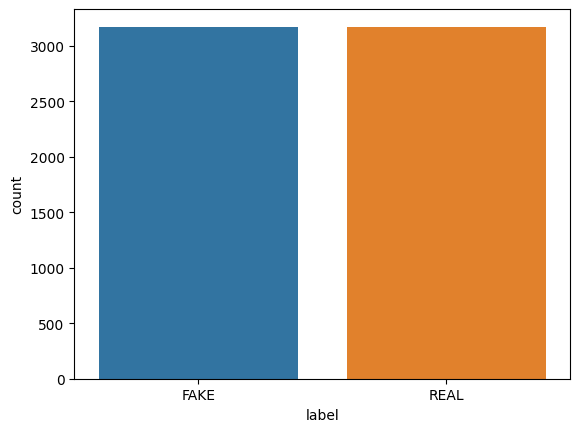

In [ ]:
sns.countplot(data=df, x=df['label'], hue='label')

# Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], train_size=0.8, random_state=5)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
pa_classifier=PassiveAggressiveClassifier(max_iter=100)
pa_classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [ ]:
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.9471191791633781


# Confusion matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

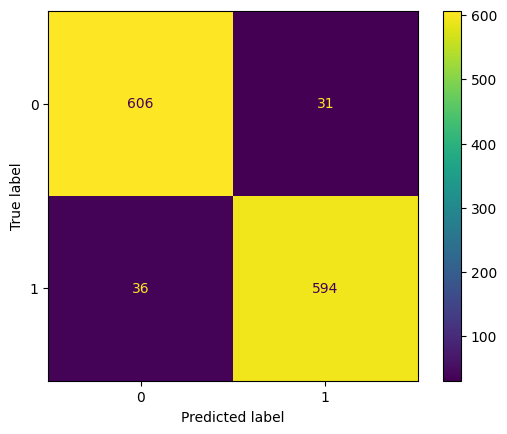

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()